# Building A Handwritten Digits Classifier

In this project I've used sklearn.neural_network's MLPClassifier on load_digits dataset and tried applying different models on data to check their overall accuracy. 
As linear and logistic regression models make assumptions about the linearity between the features and the output labels, the k-nearest neighbors algorithm make no such assumption, so I used that.

In [25]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [26]:
data= load_digits()
dir(data)

['DESCR', 'data', 'images', 'target', 'target_names']

In [27]:
len(data.data)

1797

In [28]:
data.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [29]:
data.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

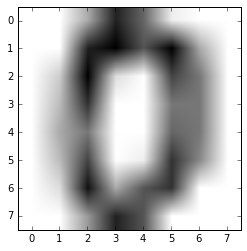

In [30]:
%matplotlib inline
plt.imshow(data.images[0], cmap='gray_r')

In [31]:
len(data.target_names)

10

In [32]:
len(data.target)

1797

In [33]:
df= pd.DataFrame(data.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [34]:
df.shape # data is already converted from 2D to 1D.

(1797, 64)

In [35]:
labels= pd.Series(data.target)
labels.head()

0    0
1    1
2    2
3    3
4    4
dtype: int64

Dataframes are a tabular representation of data, each image is represented as a row of pixel values. 
To visualize an image from the dataframe, we need to reshape the image back to its original dimensions(8x8 pixels).

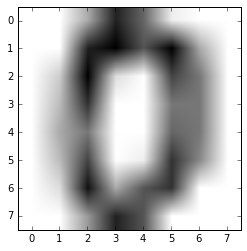

In [39]:
# 1st row.
first_image = df.iloc[0]
np_image = first_image.values
np_image = np_image.reshape(8,8)
plt.imshow(np_image, cmap='gray_r')

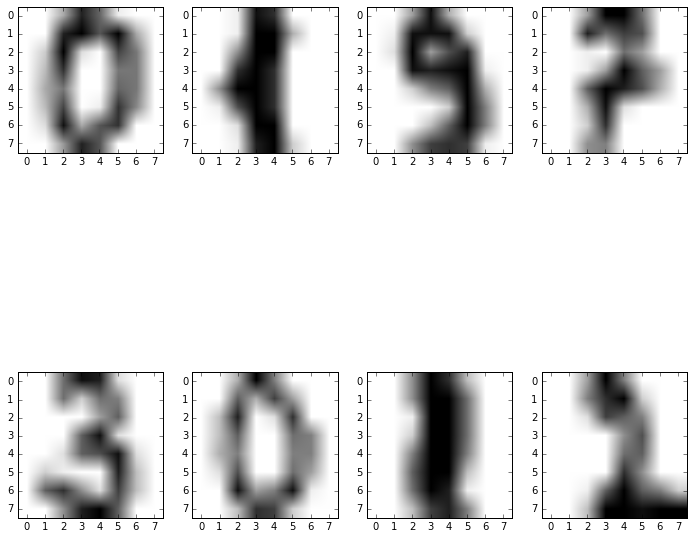

In [40]:
fig= plt.figure(figsize=(12,12))
row=[0,99,199,299,999,1099,1199,1299]
for sp in range(0,8):    
    ax= fig.add_subplot(2,4,sp+1)
    image= df.iloc[row[sp]]
    np_image = image.values
    np_image = np_image.reshape(8,8)
    ax.imshow(np_image, cmap='gray_r')
plt.show()                 

### K-Nearest Neighbors Model

In [41]:
X= df
y= labels

In [42]:
knn= KNeighborsClassifier()
k_values= list(range(4,10)) # No. of neighbors
knn_scores= list()
for i in k_values:
    kf= KFold(i,True,1)
    knn_score= cross_val_score(knn, X, y, cv= kf, scoring= 'accuracy')    
    knn_mean= np.mean(knn_score)
    knn_scores.append(round(knn_mean,3))
knn_scores


[0.983, 0.984, 0.986, 0.985, 0.986, 0.987]

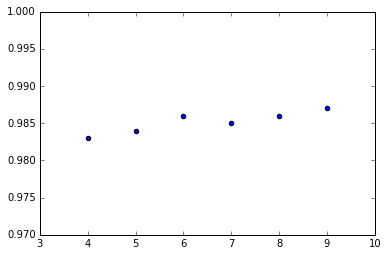

In [43]:
k_values= list(range(4,10))
plt.scatter(k_values, knn_scores)

## Neural Network With One Hidden Layer with 4-fold cross validation 

In [44]:
# Train function
def train(neurons, train_features, train_labels):
    nn= MLPClassifier(hidden_layer_sizes= neurons)
    nn.fit(train_features, train_labels)
    return nn

In [45]:
# test function
def test(model, test_features, test_labels):
    nn_pred= model.predict(test_features)
    new_df= pd.DataFrame()
    new_df['True_labels']= test_labels
    new_df['Predicted_labels']= nn_pred
    accuracy= sum((new_df['True_labels']== new_df['Predicted_labels']))/ len(new_df)
    return accuracy

In [46]:
def cross_validation(k):
    accuracy_scores= list()
    kf = KFold(4,True,2)
    for train_i,test_i in kf.split(X):
        train_features, test_features= X.loc[train_i], X.loc[test_i]
        train_labels, test_labels= y.loc[train_i], y.loc[test_i]
        model= train(k, train_features, train_labels)
        accuracy= test(model, test_features, test_labels)
        accuracy_scores.append(accuracy)
    return  accuracy_scores  

In [47]:
accuracy= cross_validation(1) # with one neuron
mean_acc= np.mean(accuracy)
mean_acc

0.13853501608512744

In [49]:
neurons= [8,16,32,64,128,256] 
final_accuracy= list()
for i in neurons:
    accuracy= cross_validation(i)
    mean_acc= np.mean(accuracy)
    final_accuracy.append(round(mean_acc,3))
final_accuracy    

[0.919, 0.958, 0.966, 0.966, 0.969, 0.975]

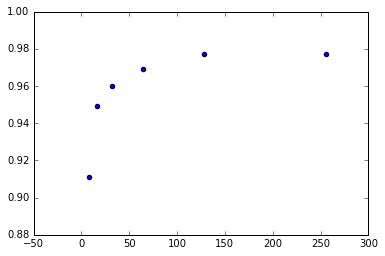

In [23]:
plt.scatter(neurons, final_accuracy)

It looks like adding more neurons to the single hidden layer helped massively improved simple accuracy from approximately 91% to approximately 97%. But K-nearest neighbors achieved approximately 98% accuracy, there doesn't seem to be any advantages to using a single hidden layer neural network for this problem.

##  Neural Network With Two Hidden Layers

In [50]:
neurons_2hl= [(64,64),
    (128, 128),
    (256, 256)]
final_accuracy_2hl= list()
for i in neurons_2hl:
    accuracy= cross_validation(i)
    mean_acc= np.mean(accuracy)
    final_accuracy_2hl.append(round(mean_acc,3))
final_accuracy_2hl    

[0.969, 0.981, 0.982]

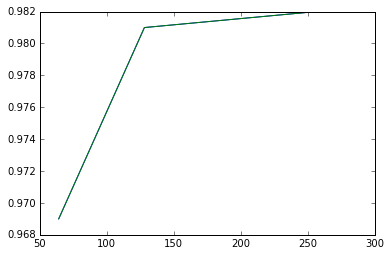

In [51]:
plt.plot(neurons_2hl, final_accuracy_2hl)

Using 2 hidden layers improved our simple accuracy to 98% greater than single hidden layer.It means using more hidden layers increase the accuarcy. 